---

# Convolution 

We demonstrate how to apply convolution to a signal and add noise.

---

## Gaussian Kernel

In this example we demonstrate how to convolve a rectangular signal with a gaussian kernel.

### Imports

Modules defined by us.

In [88]:
import convolution.kernel
import convolution.matrix

from signals import rectangle
from domain import equispaced_points

Third party modules.

In [89]:
import matplotlib.pyplot as plt

### Constructions

Constructing a domain of 513 equally spaced points centered about the origin. Each point in the domain is supposed to represent a pixel.

In [90]:
t = equispaced_points(512)

Construct a rectangular latent signal. The values in our latent signal correspond to the intensity of each pixel in the domain. 

In [91]:
latent_signal = rectangle(t) 

Construct a gaussian kernel with standard deviation of 10 pixels and mean of zero.

In [92]:
kernel = convolution.kernel.Gaussian(t, mean=0, standard_deviation=10)

Construct the convolution matrix from the kernel.

In [93]:
convolution_matrix = convolution.matrix.toeplitz(
    kernel.image, kernel.image.size // 2)

### Operations

Let us now use the convolution matrix to convolute the latent signal.

In [94]:
convoluted_signal = convolution_matrix @ latent_signal

### Visualizations

Visualize the latent signal.

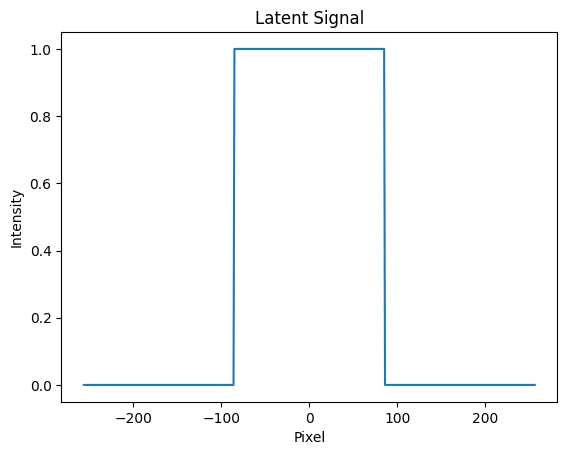

In [95]:
plt.plot(t, latent_signal)
plt.title('Latent Signal')
plt.xlabel('Pixel')
plt.ylabel('Intensity');

Vizualize the convolution matrix. See that it has toeplitz structure.

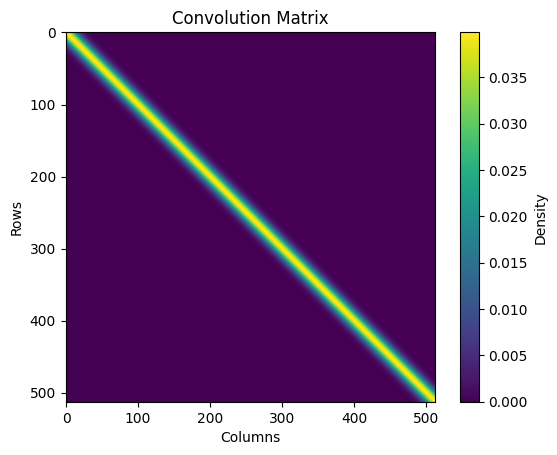

In [96]:
plt.imshow(convolution_matrix)
plt.title('Convolution Matrix')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.colorbar(label='Density');

Visualize the kernel.

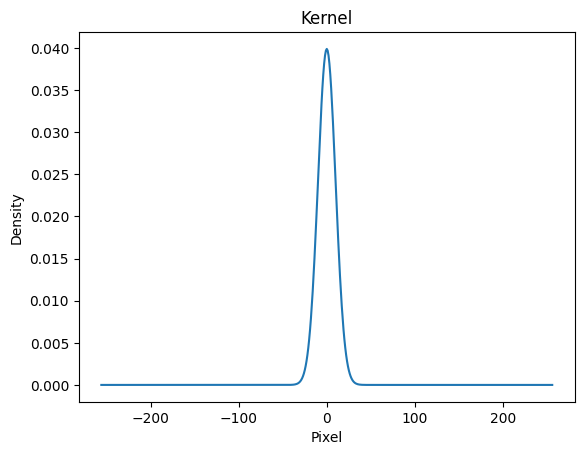

In [97]:
plt.plot(t, kernel.image)
plt.title('Kernel')
plt.xlabel('Pixel')
plt.ylabel('Density'); 

Visualize the convoluted signal. See that the edges of the latent signal have been smoothed.

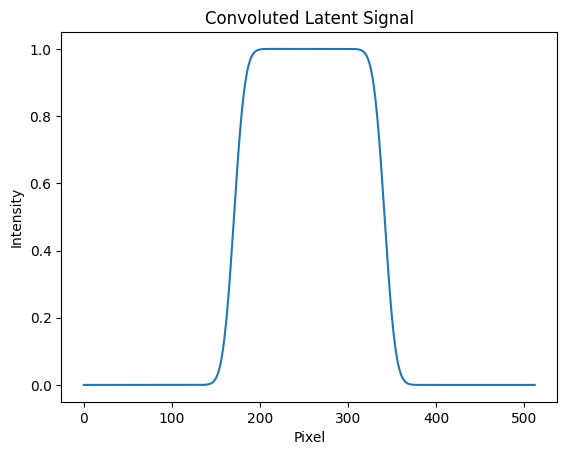

In [98]:
plt.plot(convoluted_signal)
plt.title('Convoluted Latent Signal')
plt.xlabel('Pixel')
plt.ylabel('Intensity'); 

---

## Adding Gaussian Noise

In this example we demonstrate how to construct Gaussian noise.

### Imports 

Modules defined by us. 

In [99]:
from noise import guassian_noise

Constructing the noise. Notice we pass in the convoluted signal as an argument. 

In [100]:
noise = guassian_noise(percentage=0.05, signal=convoluted_signal)

Adding 5% noise to the convoluted signal. In this case, our `data` is some convoluted signal plus an amount of gaussian noise. 

In [101]:
data = convoluted_signal + noise 

### Visualizations

Visualizing the noise.

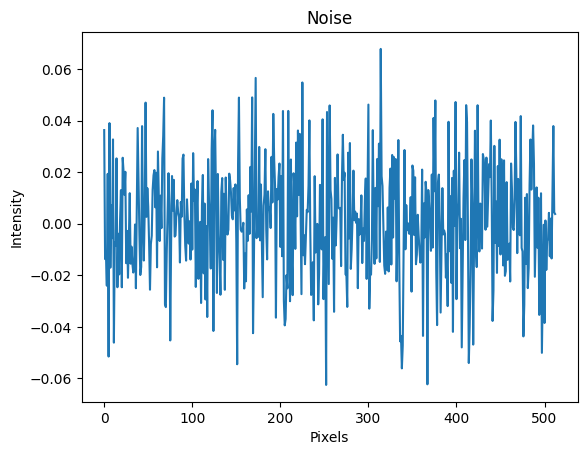

In [102]:
plt.plot(noise)
plt.title('Noise')
plt.xlabel('Pixels')
plt.ylabel('Intensity');

If we take a histogram of the noise we can begin to see the gaussian structure. 

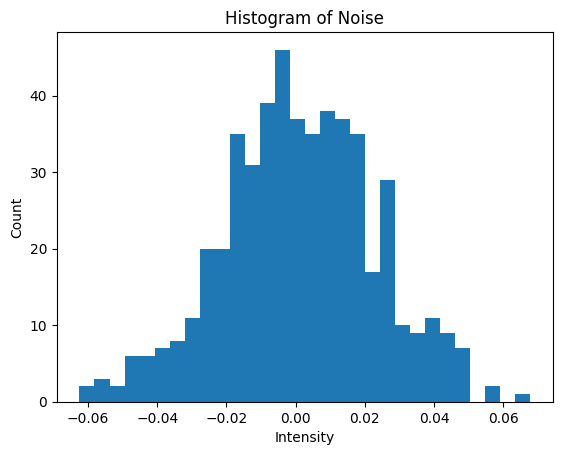

In [103]:
plt.hist(noise, bins=30)
plt.title('Histogram of Noise')
plt.xlabel('Intensity')
plt.ylabel('Count');

Visualizing the data.

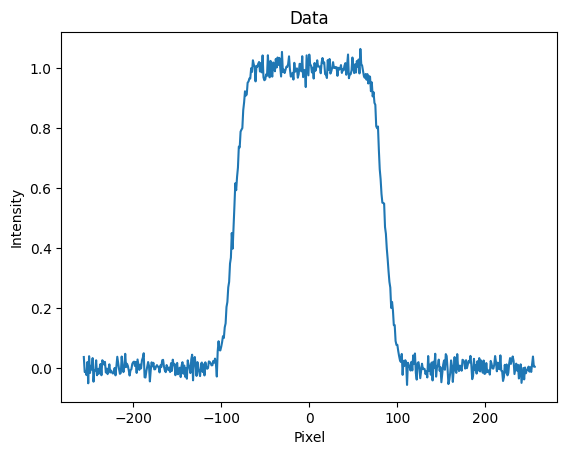

In [104]:
plt.plot(t, data)
plt.title('Data')
plt.xlabel('Pixel')
plt.ylabel('Intensity');

---

## Mixture of Kernels

Here we demonstrate how to use a mixture of kernels to convolute a signal. 

In this case, we construct two gaussian kernels.

In [105]:
k1 = convolution.kernel.Gaussian(t, 0, 10)
k2 = convolution.kernel.Gaussian(t, 0, 30)

Set the weights of the mixture. 

In [106]:
w1 = 0.5 
w2 = 0.5 

Construct the mixture using the weights and the kernels. 

In [107]:
kernel_mixture = convolution.kernel.Mixture(
    weights=[w1, w2], 
    kernels=[k1, k2]
)

Construct the convolution matrix using the kernel mixture. 

In [108]:
convolution_matrix = convolution.matrix.toeplitz(
    kernel_mixture.image, kernel_mixture.image.size // 2)

Apply the convolution operation. 

In [109]:
convoluted_signal = convolution_matrix @ latent_signal 

Construct the noise.

In [110]:
noise = guassian_noise(percentage=0.05, signal=convoluted_signal)

Add the noise to the convoluted signal.

In [111]:
data = convoluted_signal + noise 

### Visualizing

Visualize the kernel mixture.

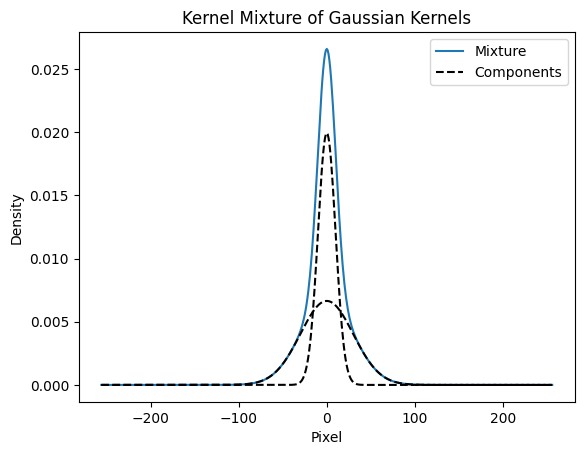

In [112]:
plt.plot(t, kernel_mixture.image, label='Mixture')
plt.plot(t, w1 * k1.image, 'k--', label='Components')
plt.plot(t, w2 * k2.image, 'k--'); plt.legend()
plt.title('Kernel Mixture of Gaussian Kernels')
plt.xlabel('Pixel'); plt.ylabel('Density');

Visualize the convolution matrix of the kernel mixture.

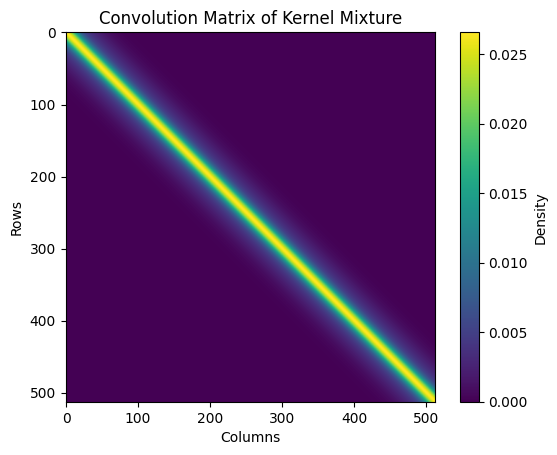

In [113]:
plt.imshow(convolution_matrix)
plt.title('Convolution Matrix of Kernel Mixture')
plt.colorbar(label='Density')
plt.xlabel('Columns')
plt.ylabel('Rows');

Visualize the convoluted data. 

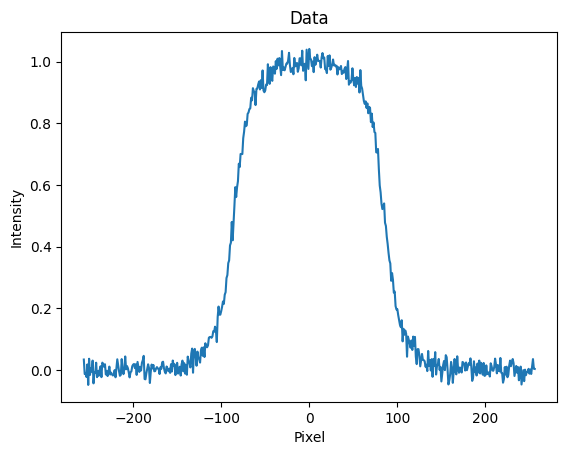

In [114]:
plt.plot(t, data)
plt.title('Data')
plt.xlabel('Pixel')
plt.ylabel('Intensity');

---

# The End

In [115]:
!jupyter nbconvert convolution-example.ipynb --to slides --post serve

[NbConvertApp] Converting notebook convolution-example.ipynb to slides
[NbConvertApp] WARNING | Alternative text is missing on 10 image(s).
[NbConvertApp] Writing 718896 bytes to convolution-example.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/convolution-example.slides.html
Use Control-C to stop this server


404 GET /example.slides.html (127.0.0.1) 0.43ms
^C

Interrupted
